In [1]:
import torch
import numpy as np
import random
import opensmile

import pickle

import seaborn as sns
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

import os

In [2]:
torch.__version__

'2.0.0+cu117'

In [3]:
rootdir = '../data_2'
data_list = []
with open(f'../data_base_2.pickle', 'rb') as fh:
    data_list = pickle.load(fh)

In [4]:
data_list[0]

{'name': '29b4d0958882b4866ca723a3d1548e31_SNR_3',
 'marks': array([0, 0, 0, ..., 0, 0, 0], dtype=int8)}

In [5]:
path_data = f'{rootdir}/'

end_idx_tv = 87000
train_valid_subset = data_list[:end_idx_tv]
test_subset = data_list[end_idx_tv:]

lengths = [int(len(train_valid_subset) * 0.9), int(len(train_valid_subset) * 0.1)]
train_subset, valid_subset = torch.utils.data.random_split(train_valid_subset, lengths)
len(train_subset)

78300

In [6]:
random.seed(123456)
np.random.seed(123456)
torch.manual_seed(123456)

In [7]:
smile = opensmile.Smile(feature_set=opensmile.FeatureSet.emobase,
                feature_level=opensmile.FeatureLevel.LowLevelDescriptors)
smile.process_file(f'{path_data}/5f4edcae839e9c7800bd2781ff6cfa71_SNR_3.wav')

pcm_intensity_sma  \
file                                               start                  end                                         
../data_2//5f4edcae839e9c7800bd2781ff6cfa71_SNR... 0 days 00:00:00        0 days 00:00:00.025000       1.483837e-07   
                                                   0 days 00:00:00.010000 0 days 00:00:00.035000       2.447667e-07   
                                                   0 days 00:00:00.020000 0 days 00:00:00.045000       2.668529e-07   
                                                   0 days 00:00:00.030000 0 days 00:00:00.055000       4.475613e-07   
                                                   0 days 00:00:00.040000 0 days 00:00:00.065000       6.832497e-07   
...                                                                                                             ...   
                                                   0 days 00:00:05.930000 0 days 00:00:05.955000       2.436783e-07   
                                                   0 days 00:00:05.940000 0 days 00:00:05.965000       1.800450e-07   
                                                   0 days 00:00:05.950000 0 days 00:00:05.975000       1.753107e-07   
                                                   0 days 00:00:05.960000 0 days 00:00:05.985000       1.553826e-07   
                                                   0 days 00:00:05.970000 0 days 00:00:06              1.224016e-07   

                                                                                                  pcm_loudness_sma  \
file                                               start                  end                                        
../data_2//5f4edcae839e9c7800bd2781ff6cfa71_SNR... 0 days 00:00:00        0 days 00:00:00.025000          0.563944   
                                                   0 days 00:00:00.010000 0 days 00:00:00.035000          0.637391   
                                                   0 days 00:00:00.020000 0 days 00:00:00.045000          0.660013   
                                                   0 days 00:00:00.030000 0 days 00:00:00.055000          0.767033   
                                                   0 days 00:00:00.040000 0 days 00:00:00.065000          0.854613   
...                                                                                                            ...   
                                                   0 days 00:00:05.930000 0 days 00:00:05.955000          0.642737   
                                                   0 days 00:00:05.940000 0 days 00:00:05.965000          0.597341   
                                                   0 days 00:00:05.950000 0 days 00:00:05.975000          0.592329   
                                                   0 days 00:00:05.960000 0 days 00:00:05.985000          0.567732   
                                                   0 days 00:00:05.970000 0 days 00:00:06                 0.530298   

                                                                                                  mfcc_sma[1]  \
file                                               start                  end                                   
../data_2//5f4edcae839e9c7800bd2781ff6cfa71_SNR... 0 days 00:00:00        0 days 00:00:00.025000   -31.718285   
                                                   0 days 00:00:00.010000 0 days 00:00:00.035000   -31.582565   
                                                   0 days 00:00:00.020000 0 days 00:00:00.045000   -30.977066   
                                                   0 days 00:00:00.030000 0 days 00:00:00.055000   -31.748747   
                                                   0 days 00:00:00.040000 0 days 00:00:00.065000   -31.736212   
...                                                                                                       ...   
                                                   0 days 00:00:05.930000 0 days 00:00:05.955000   -32.968582  

In [8]:
def create_marks(old_marks):
    data_mark = []
    step = 81
    for window in np.arange(0, len(old_marks)-step, step):
        values, counts = np.unique(old_marks[window:step+window], return_counts=True)
        max_count = max(counts)
        most_frequent = values[counts == max_count]
        data_mark.append(most_frequent[0])
    return data_mark

def db_create(subset, common_db):
    xname = subset['name']
    temp = smile.process_file(f"{rootdir}/{xname}.wav")
    temp = temp.iloc[:592]
    old_marks = subset['marks']    
    temp['marks'] = create_marks(old_marks)
    common_db = pd.concat([common_db, temp], axis=0)
    return common_db

In [9]:
train_subset[0]['marks']

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [11]:
common_db = pd.DataFrame()
for i in tqdm(range(500)):
    common_db = db_create(train_subset[i], common_db)

common_db.to_csv('common_db.csv', sep='\t')
common_db

  0%|          | 0/500 [00:00<?, ?it/s]

pcm_intensity_sma  \
file                                               start                  end                                         
../data_2/565e6660d56d149812ebd21b3b7d7761_SNR_... 0 days 00:00:00        0 days 00:00:00.025000           0.000019   
                                                   0 days 00:00:00.010000 0 days 00:00:00.035000           0.000016   
                                                   0 days 00:00:00.020000 0 days 00:00:00.045000           0.000026   
                                                   0 days 00:00:00.030000 0 days 00:00:00.055000           0.000017   
                                                   0 days 00:00:00.040000 0 days 00:00:00.065000           0.000025   
...                                                                                                             ...   
../data_2/0f0e802d760f0878576749e81cf684ab_SNR_... 0 days 00:00:05.870000 0 days 00:00:05.895000           0.000062   
                                                   0 days 00:00:05.880000 0 days 00:00:05.905000           0.000041   
                                                   0 days 00:00:05.890000 0 days 00:00:05.915000           0.000018   
                                                   0 days 00:00:05.900000 0 days 00:00:05.925000           0.000012   
                                                   0 days 00:00:05.910000 0 days 00:00:05.935000           0.000018   

                                                                                                  pcm_loudness_sma  \
file                                               start                  end                                        
../data_2/565e6660d56d149812ebd21b3b7d7761_SNR_... 0 days 00:00:00        0 days 00:00:00.025000          2.412753   
                                                   0 days 00:00:00.010000 0 days 00:00:00.035000          2.177746   
                                                   0 days 00:00:00.020000 0 days 00:00:00.045000          2.482527   
                                                   0 days 00:00:00.030000 0 days 00:00:00.055000          1.779839   
                                                   0 days 00:00:00.040000 0 days 00:00:00.065000          2.158776   
...                                                                                                            ...   
../data_2/0f0e802d760f0878576749e81cf684ab_SNR_... 0 days 00:00:05.870000 0 days 00:00:05.895000          3.308972   
                                                   0 days 00:00:05.880000 0 days 00:00:05.905000          2.661272   
                                                   0 days 00:00:05.890000 0 days 00:00:05.915000          2.256998   
                                                   0 days 00:00:05.900000 0 days 00:00:05.925000          1.846792   
                                                   0 days 00:00:05.910000 0 days 00:00:05.935000          2.159708   

                                                                                                  mfcc_sma[1]  \
file                                               start                  end                                   
../data_2/565e6660d56d149812ebd21b3b7d7761_SNR_... 0 days 00:00:00        0 days 00:00:00.025000   -30.558832   
                                                   0 days 00:00:00.010000 0 days 00:00:00.035000   -30.742081   
                                                   0 days 00:00:00.020000 0 days 00:00:00.045000   -30.572264   
                                                   0 days 00:00:00.030000 0 days 00:00:00.055000   -29.207909   
                                                   0 days 00:00:00.040000 0 days 00:00:00.065000   -29.201777   
...                                                                                                       ...   
../data_2/0f0e802d760f0878576749e81cf684ab_SNR_... 0 days 00:00:05.870000 0 days 00:00:05.895000   -30.379112  

In [12]:
len(common_db['marks'])

296000

In [13]:
feature_db = pd.read_csv('common_db.csv', sep='\t')
feature_db

,file,start,end,pcm_intensity_sma,pcm_loudness_sma,mfcc_sma[1],mfcc_sma[2],mfcc_sma[3],mfcc_sma[4],mfcc_sma[5],...,lspFreq_sma[3],lspFreq_sma[4],lspFreq_sma[5],lspFreq_sma[6],lspFreq_sma[7],pcm_zcr_sma,voiceProb_sma,F0_sma,F0env_sma,marks
0,../data_2/565e6660d56d149812ebd21b3b7d7761_SNR...,0 days 00:00:00,0 days 00:00:00.025000,0.000019,2.412753,-30.558832,-9.267522,-12.354404,-12.132899,-6.631006,...,1.567815,1.909209,2.166060,2.491730,2.848682,0.498333,0.185339,0.0,0.00000,0
1,../data_2/565e6660d56d149812ebd21b3b7d7761_SNR...,0 days 00:00:00.010000,0 days 00:00:00.035000,0.000016,2.177746,-30.742080,-7.763590,-10.159470,-9.117658,-9.445218,...,1.582485,1.895098,2.170807,2.489987,2.851817,0.486667,0.162311,0.0,0.00000,0
2,../data_2/565e6660d56d149812ebd21b3b7d7761_SNR...,0 days 00:00:00.020000,0 days 00:00:00.045000,0.000026,2.482527,-30.572264,-7.865139,-8.829864,-11.909339,-12.650092,...,1.592455,1.878013,2.181342,2.510613,2.853082,0.468333,0.156815,0.0,0.00000,0
3,../data_2/565e6660d56d149812ebd21b3b7d7761_SNR...,0 days 00:00:00.030000,0 days 00:00:00.055000,0.000017,1.779839,-29.207909,-6.643945,-7.167683,-7.502248,-11.348695,...,1.566857,1.861281,2.179166,2.515383,2.854801,0.450000,0.153790,0.0,0.00000,0
4,../data_2/565e6660d56d149812ebd21b3b7d7761_SNR...,0 days 00:00:00.040000,0 days 00:00:00.065000,0.000025,2.158776,-29.201777,-9.101505,-8.126362,-8.313251,-10.092080,...,1.536118,1.871678,2.189002,2.518092,2.839295,0.440000,0.179239,0.0,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295995,../data_2/0f0e802d760f0878576749e81cf684ab_SNR...,0 days 00:00:05.870000,0 days 00:00:05.895000,0.000062,3.308972,-30.379112,-6.360489,-7.186457,-10.365874,-6.907000,...,1.569574,1.870030,2.195538,2.480203,2.836336,0.471667,0.148335,0.0,249.54913,0
295996,../data_2/0f0e802d760f0878576749e81cf684ab_SNR...,0 days 00:00:05.880000,0 days 00:00:05.905000,0.000041,2.661272,-29.580858,-8.158601,-9.413013,-9.577010,-9.677815,...,1.555863,1.857360,2.191170,2.503244,2.862348,0.476667,0.149068,0.0,249.54913,0
295997,../data_2/0f0e802d760f0878576749e81cf684ab_SNR...,0 days 00:00:05.890000,0 days 00:00:05.915000,0.000018,2.256998,-29.621786,-11.139146,-12.105639,-9.990413,-11.625893,...,1.542443,1.857156,2.182263,2.523439,2.856333,0.493333,0.142475,0.0,249.54913,0
295998,../data_2/0f0e802d760f0878576749e81cf684ab_SNR...,0 days 00:00:05.900000,0 days 00:00:05.925000,0.000012,1.846792,-31.102974,-11.661727,-13.236451,-7.318355,-9.980885,...,1.544865,1.869419,2.197532,2.529670,2.820451,0.523333,0.155776,0.0,249.54913,0


In [14]:
values = list(feature_db.columns)[3:]

In [15]:
values

['pcm_intensity_sma',
 'pcm_loudness_sma',
 'mfcc_sma[1]',
 'mfcc_sma[2]',
 'mfcc_sma[3]',
 'mfcc_sma[4]',
 'mfcc_sma[5]',
 'mfcc_sma[6]',
 'mfcc_sma[7]',
 'mfcc_sma[8]',
 'mfcc_sma[9]',
 'mfcc_sma[10]',
 'mfcc_sma[11]',
 'mfcc_sma[12]',
 'lspFreq_sma[0]',
 'lspFreq_sma[1]',
 'lspFreq_sma[2]',
 'lspFreq_sma[3]',
 'lspFreq_sma[4]',
 'lspFreq_sma[5]',
 'lspFreq_sma[6]',
 'lspFreq_sma[7]',
 'pcm_zcr_sma',
 'voiceProb_sma',
 'F0_sma',
 'F0env_sma',
 'marks']

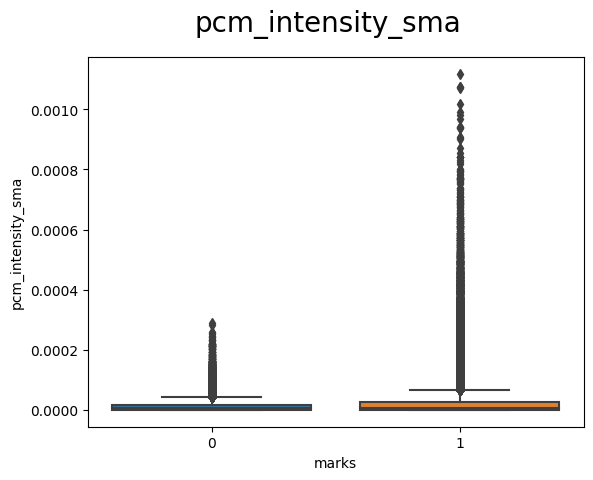

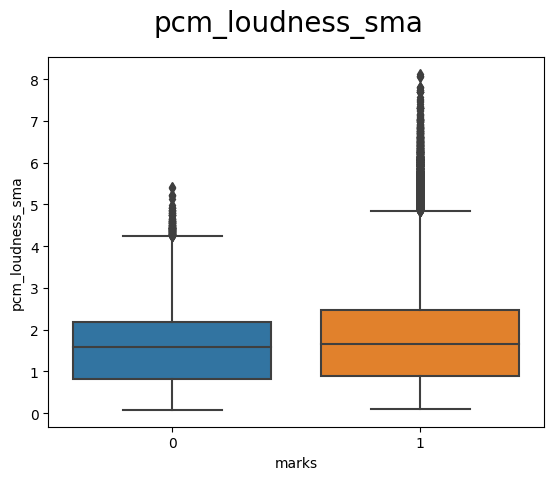

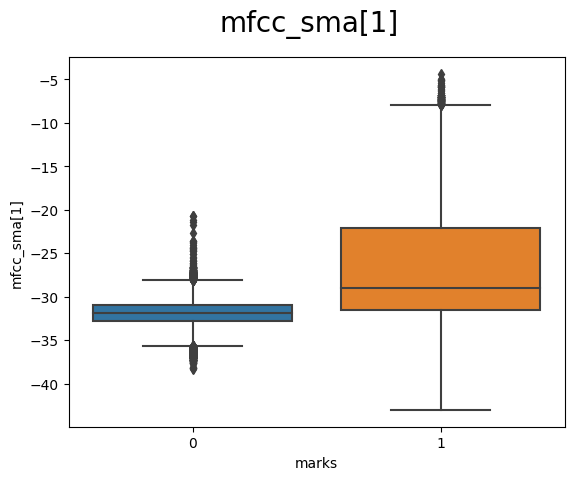

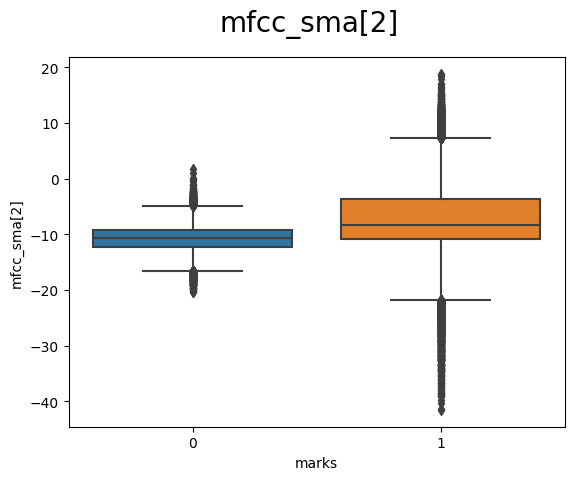

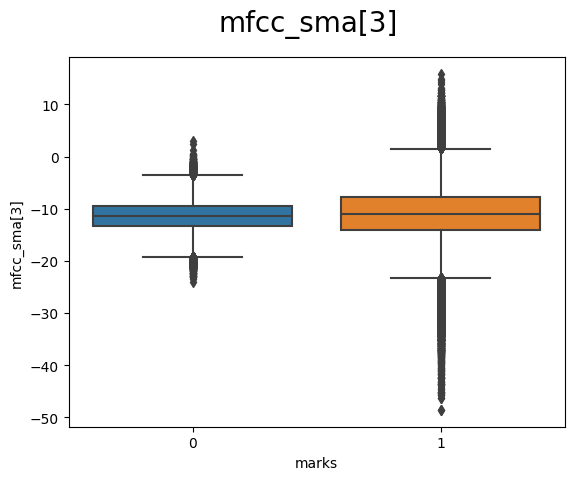

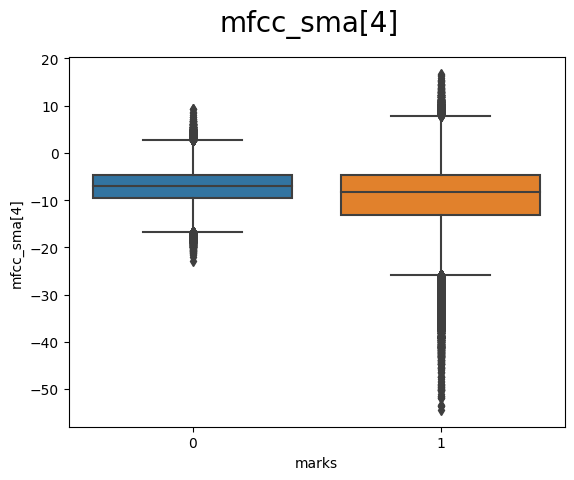

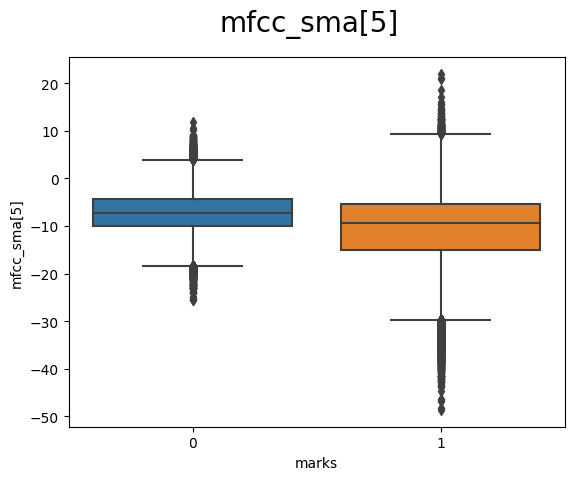

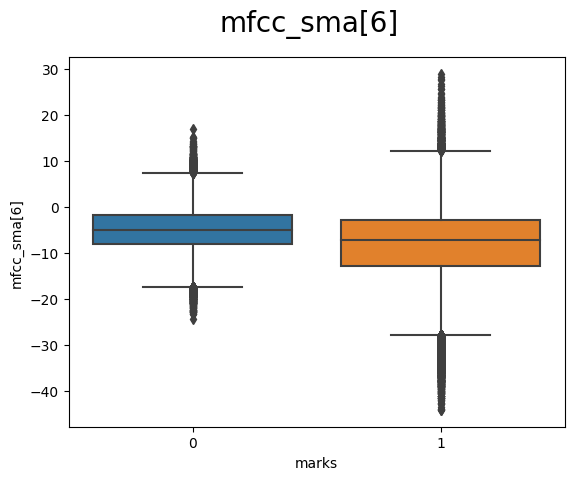

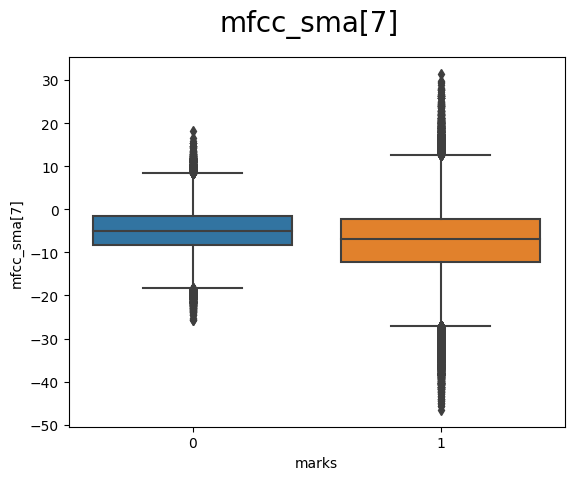

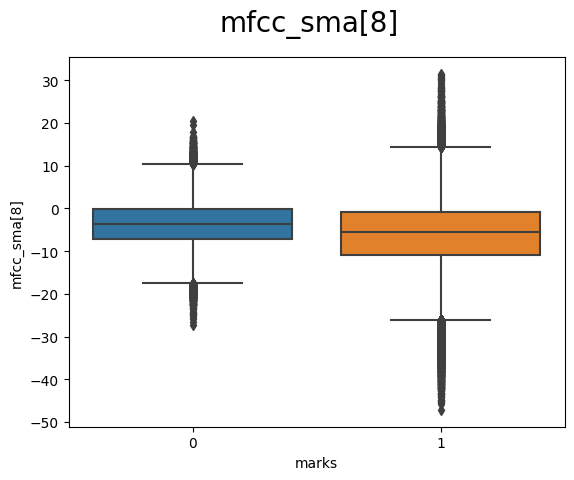

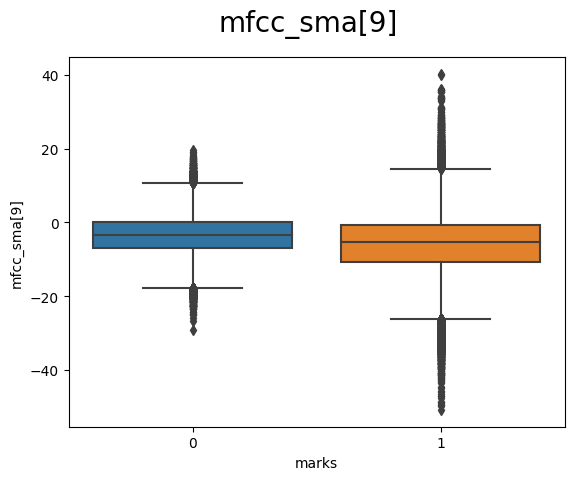

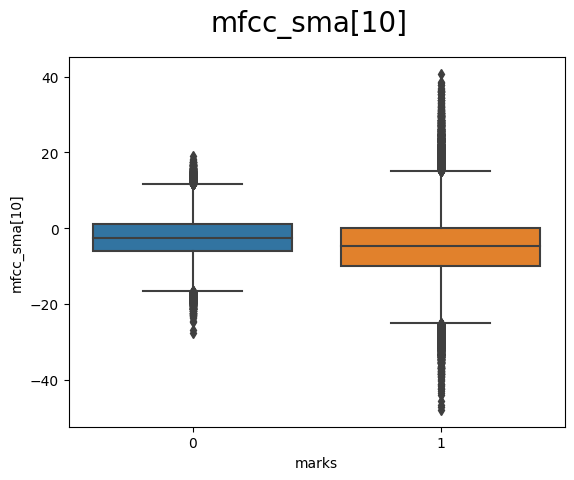

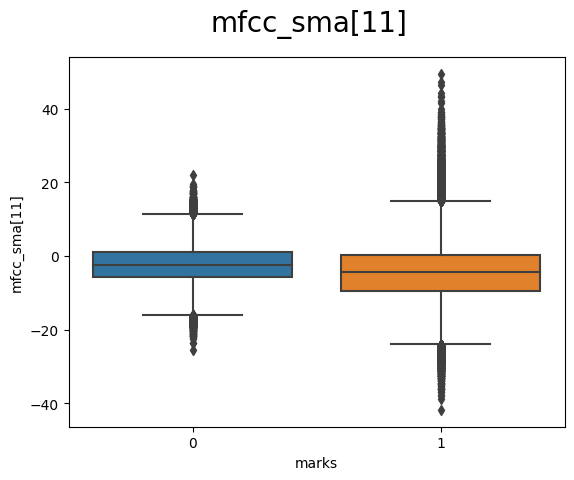

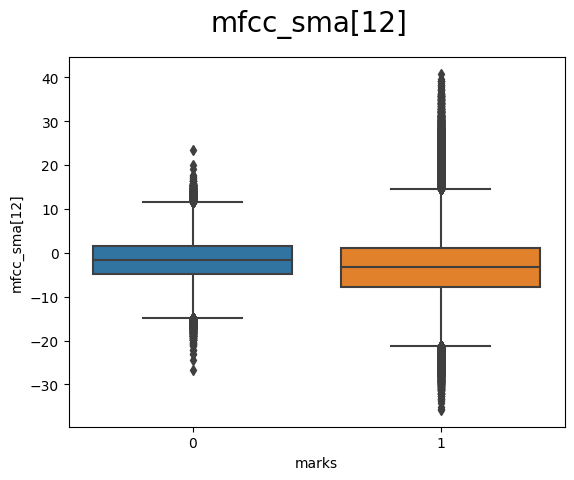

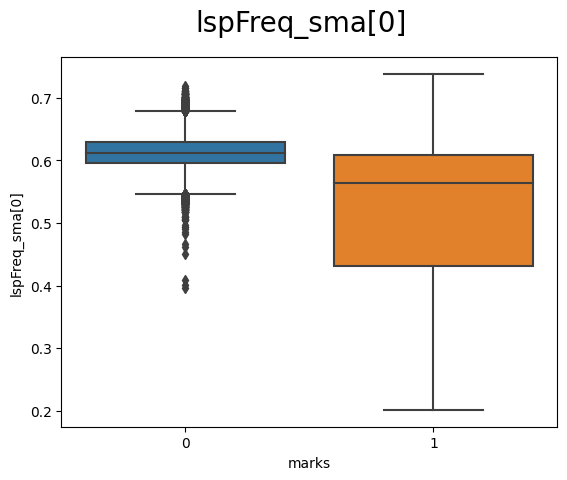

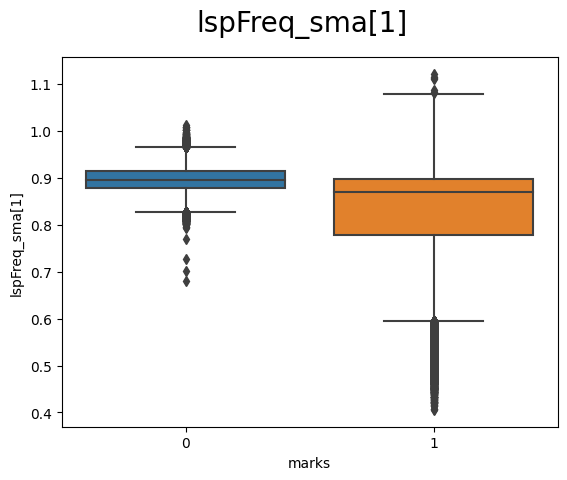

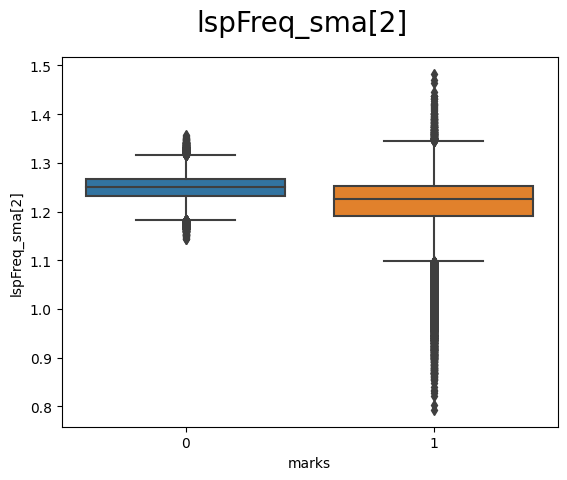

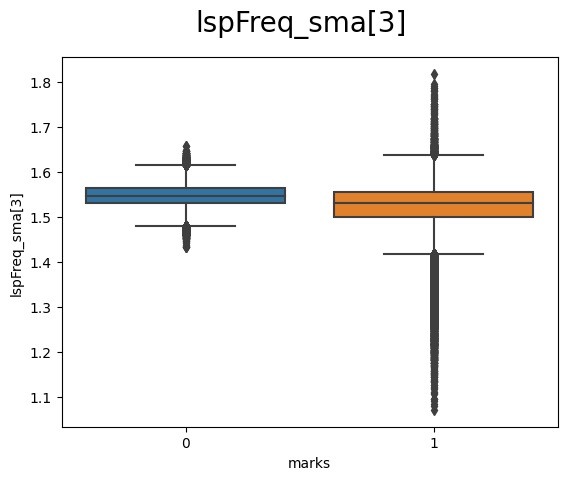

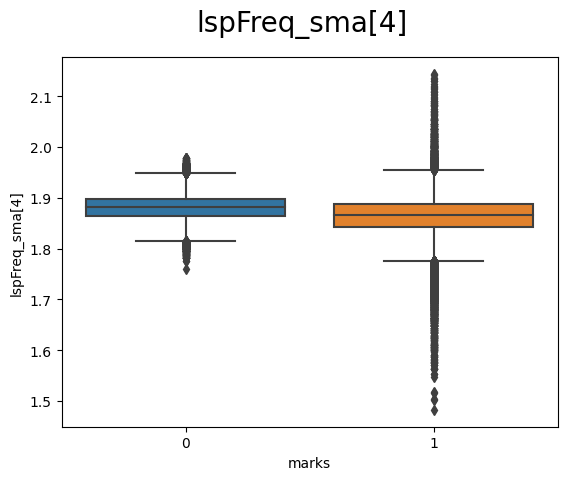

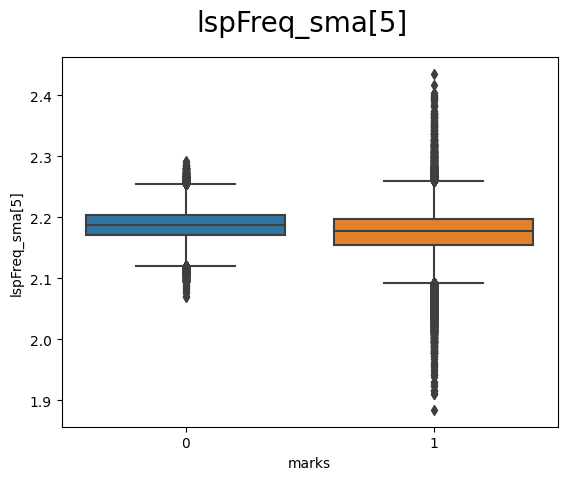

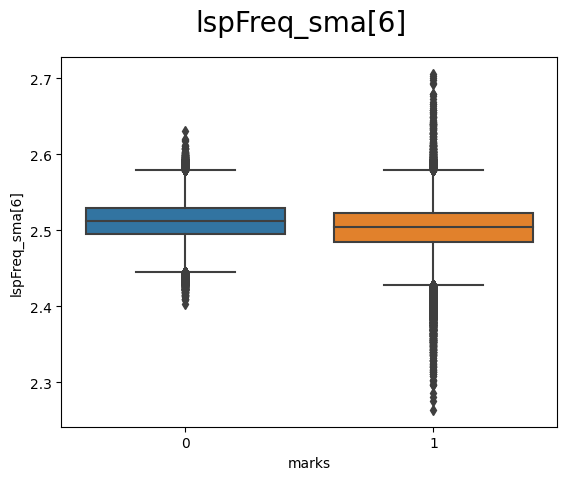

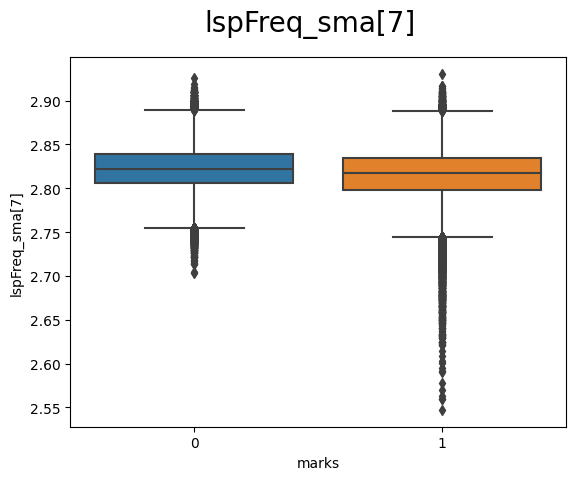

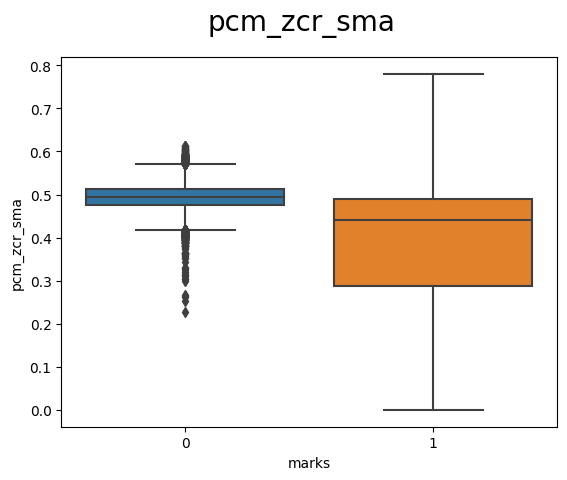

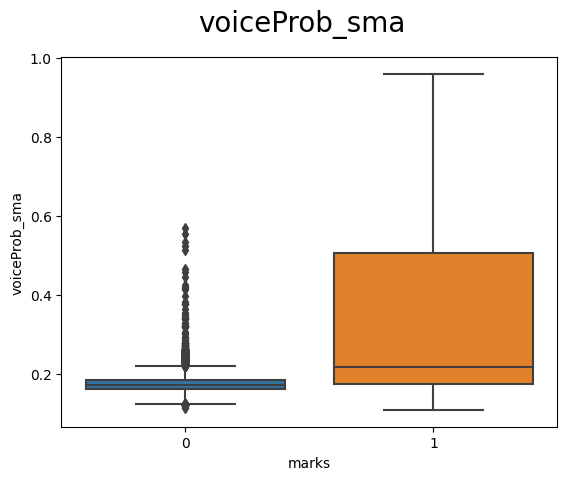

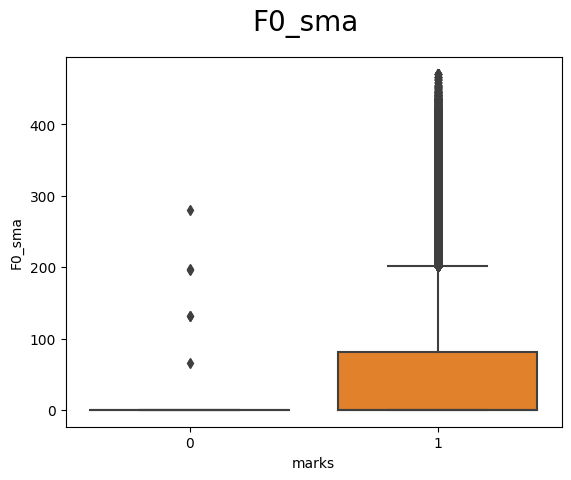

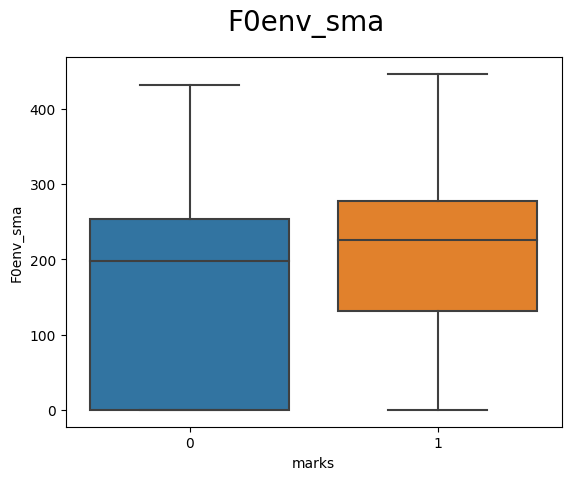

In [18]:
for value in values[:-1]:
    dist_graph = sns.boxplot(data=feature_db, x="marks", y=value)
    fig = dist_graph.get_figure()
    fig.suptitle(f'{value}', fontsize=20)
    fig.savefig(f"dist_emobase/{value}.png") 
    plt.show()
